# **CHAPTER 10 - SIMPLE LINEAR REGRESSION**

## **By Ronan Howard**

## **What does a Simple Linear Regression Model do?**
#### It uses only one independent variable to predict the value of a dependent variable

In [4]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [5]:
diamonds = sns.load_dataset('diamonds')

In [6]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## **Pearson Correlation Coefficient Value (r-value)**
- The r-value measures the type and strength of the linear correlation between two variables
- The possible range of r-values are -1.00 to 1.00
- The values that indicate positive correlation are from 0.31 to 1.00
- The values that indicate negative correlation are from -0.31 to -1.00
- The values that indicate no correlation are from -0.30 to 0.30

In [7]:
diamonds.corr().head(7)

C:\Users\rchow\AppData\Local\Temp\ipykernel_11076\3374014405.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  diamonds.corr().head(7)


,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


C:\Users\rchow\AppData\Local\Temp\ipykernel_11076\2401933630.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data = diamonds.corr()[['price']].sort_values(by = 'price', ascending = False), annot = True, cmap = 'Greens', cbar = False, fmt = f'.3f')


<Axes: >

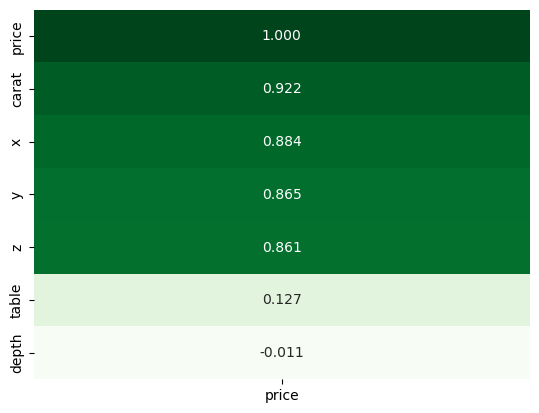

In [8]:
sns.heatmap(data = diamonds.corr()[['price']].sort_values(by = 'price', ascending = False), annot = True, cmap = 'Greens', cbar = False, fmt = f'.3f')

## **Procedure for Creating and Using a Regression Model**
1. Split dataset
2. Create model from training dataset
3. Validate model with test dataset
4. If model is valid, predict data with it

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [30]:
x_train, x_test, y_train, y_test = train_test_split(diamonds[['carat']], diamonds[['price']], test_size = .3, random_state = 20)

In [31]:
model = LinearRegression()
display(model)

LinearRegression()

In [33]:
model.fit(x_train,y_train)

LinearRegression()

In [34]:
model.score(x_test, y_test)

0.8504107786474794

In [37]:
y_predicted = model.predict(x_test)
display(y_predicted)

array([[9540.64191438],
       [1940.07543252],
       [3180.98424589],
       ...,
       [9618.19871522],
       [-464.18539337],
       [5507.68827094]])

In [54]:
predicted_price = pd.DataFrame(data = y_predicted, columns = ['predicted_price'])
predicted_price.head(3)

,predicted_price
0,9540.641914
1,1940.075433
2,3180.984246


In [67]:
combined = predicted_price.join([y_test.reset_index(drop=True), x_test.reset_index(drop=True)])
combined.loc[:,['carat','price','predicted_price']].head()

,carat,price,predicted_price
0,1.52,8674,9540.641914
1,0.54,1637,1940.075433
2,0.70,2657,3180.984246
3,0.59,1838,2327.859437
4,0.86,2980,4421.893059


In [69]:
melted = pd.melt(combined, id_vars = ['carat'], value_vars = ['price','predicted_price'], var_name = 'price_type', value_name = 'price_value')
display(melted)

,carat,price_type,price_value
0,1.52,price,8674.000000
1,0.54,price,1637.000000
2,0.70,price,2657.000000
3,0.59,price,1838.000000
4,0.86,price,2980.000000
...,...,...,...
32359,0.31,predicted_price,156.269013
32360,1.01,predicted_price,5585.245072
32361,1.53,predicted_price,9618.198715
32362,0.23,predicted_price,-464.185393


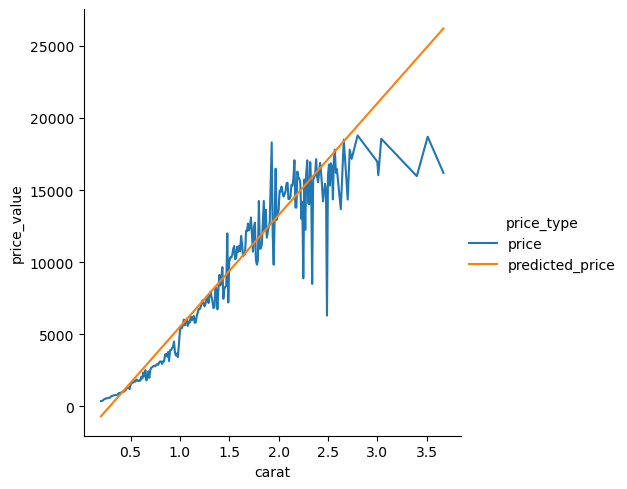

In [75]:
sns.relplot(data = melted, kind = 'line', x = 'carat', y = 'price_value', hue = 'price_type', errorbar = ('ci', 0))

## Regression line equation is **y = mx + b**, where...
- y is the **dependent** variable
- m is the **slope** of the line
- x is the **independent** variable
- b is the **Y-intercept**

In [78]:
# Changed "data" to "diamonds" so the name is defined
X = diamonds.carat.values.reshape(-1,1)
y = diamonds.price

In [79]:
lr = LinearRegression()
predicted = lr.fit(X,y)

In [80]:
m = predicted.coef_
b = predicted.intercept_
print(f'The slope is {m} and the y-intercept is {b}')

The slope is [7756.42561797] and the y-intercept is -2256.3605800454575


In [81]:
print(f'Regression line equation is y = {m}x + {b}')

Regression line equation is y = [7756.42561797]x + -2256.3605800454575


In [92]:
carats = 0.7
before_b = carats * m
after_b = before_b + b
after_b = float(after_b)
print(f'The predicted price for a {carats} carat diamond is ${after_b:,.2f}')

The predicted price for a 0.7 carat diamond is $3,173.14


In [93]:
carats = 0.54
before_b = carats * m
after_b = before_b + b
after_b = float(after_b)
print(f'The predicted price for a {carats} carat diamond is ${after_b:,.2f}')

The predicted price for a 0.54 carat diamond is $1,932.11


Yes, the estimates are very close to the result previously predicted by the model. They are only different by about $8 for each